<a href="https://colab.research.google.com/github/himabindu-thota/W207-AppliedML-final-project/blob/main/Ensemble_Model_LightGradientBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from sklearn import tree
import pydot
from IPython.core.display import Image, display
import seaborn as sns # statistical data visualization

In [175]:
y_df  = pd.read_csv("yieldcurves_v2.csv", parse_dates=["Date"])
sp_df = pd.read_csv("SPX_500_Daily_Data_1927_2021.csv", parse_dates=["Date"])

In [176]:
y_df.set_index("Date", inplace = True)
sp_df.set_index("Date", inplace = True)

In [177]:
y_df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0


In [178]:
y_df.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2021-12-27,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.88,0
2021-12-28,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.90,0
2021-12-29,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,1.96,0
2021-12-30,0.05,0.19,0.38,0.73,0.98,1.27,1.44,1.52,1.93,0
2021-12-31,0.06,0.19,0.39,0.73,0.97,1.26,1.44,1.52,1.90,0


In [179]:
y_df

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.06,0.21,0.33,0.76,0.98,1.26,1.41,1.48,1.88,0
2021-12-28,0.06,0.20,0.39,0.74,0.99,1.27,1.41,1.49,1.90,0
2021-12-29,0.05,0.19,0.38,0.75,0.99,1.29,1.47,1.55,1.96,0


In [180]:
sp_df.head()

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0,0.0000,0.0
1928-01-03,17.76,17.76,17.76,17.76,17.76,0,0.5631,0.0
1928-01-04,17.72,17.72,17.72,17.72,17.72,0,-0.2257,0.0
1928-01-05,17.55,17.55,17.55,17.55,17.55,0,-0.9687,0.0
1928-01-09,17.50,17.50,17.50,17.50,17.50,0,-0.2857,0.0


In [181]:
sp_df.tail()

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
2021-09-13,4474.81,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,4447.49,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011
2021-09-16,4477.09,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
2021-09-17,4469.74,4471.52,4427.76,4432.99,4432.99,5622210000,-0.9195,0.010


In [182]:
sp_df

,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,
1927-12-30,17.66,17.66,17.66,17.66,17.66,0,0.0000,0.000
1928-01-03,17.76,17.76,17.76,17.76,17.76,0,0.5631,0.000
1928-01-04,17.72,17.72,17.72,17.72,17.72,0,-0.2257,0.000
1928-01-05,17.55,17.55,17.55,17.55,17.55,0,-0.9687,0.000
1928-01-09,17.50,17.50,17.50,17.50,17.50,0,-0.2857,0.000
...,...,...,...,...,...,...,...,...
2021-09-13,4474.81,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,4479.33,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,4447.49,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011


In [183]:
y_df.isnull().sum()

3 Mo            4
6 Mo            1
1 Yr            1
2 Yr            1
3 Yr            1
5 Yr            1
7 Yr            1
10 Yr           1
30 Yr         995
Recession       0
dtype: int64

In [184]:
y_df[y_df['30 Yr'].isna()]

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2002-02-19,1.76,1.87,2.23,2.98,3.52,4.28,4.71,4.88,NaN,0
2002-02-20,1.76,1.87,2.24,3.00,3.53,4.28,4.71,4.88,NaN,0
2002-02-21,1.76,1.87,2.25,3.00,3.52,4.27,4.72,4.88,NaN,0
2002-02-22,1.76,1.86,2.22,2.97,3.48,4.23,4.67,4.84,NaN,0
2002-02-25,1.77,1.89,2.26,3.01,3.53,4.26,4.69,4.86,NaN,0
...,...,...,...,...,...,...,...,...,...,...
2006-02-03,4.48,4.63,4.62,4.59,4.54,4.50,4.51,4.54,NaN,0
2006-02-06,4.48,4.68,4.66,4.62,4.57,4.51,4.52,4.55,NaN,0
2006-02-07,4.49,4.67,4.65,4.61,4.57,4.52,4.54,4.57,NaN,0


In [185]:
import datetime

def fill_nan_with_weekly_average(df):
  # Compute weekly averages

  monday = pd.Timestamp("1990-01-08")
  lastday = pd.Timestamp("2021-12-31")

  prev_avg = {}
  avg = {}
  while monday <= lastday:
    week = pd.date_range(monday, periods = 5, freq = "D")
    sub_df = df[week[0]:week[4]]

    for col in sub_df:
      avg[col] = sub_df[col].mean(skipna=True)
      if pd.isna(avg[col]):
        avg[col] = prev_avg[col]
      else:
        prev_avg[col] = avg[col]
      if sub_df[col].isnull().sum() != 0:
        for idx in week:
          try:
            if pd.isna(df[col].loc[idx]):
              df[col].loc[idx] = avg[col]
          except KeyError as e:
            # Must be a holiday
            pass
        
    monday = week[4] + datetime.timedelta(3
                                          )

fill_nan_with_weekly_average(y_df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [186]:
y_df.isnull().sum()

3 Mo          0
6 Mo          0
1 Yr          0
2 Yr          0
3 Yr          0
5 Yr          0
7 Yr          0
10 Yr         0
30 Yr         0
Recession     0
dtype: int64

In [187]:
y_df["2010-10-5":"2010-10-15"]

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2010-10-05,0.120,0.1800,0.2500,0.4100,0.6000,1.2100,1.8300,2.5000,3.7400,0
2010-10-06,0.130,0.1700,0.2400,0.3800,0.5700,1.1600,1.7700,2.4100,3.6700,0
2010-10-07,0.130,0.1700,0.2300,0.3600,0.5400,1.1400,1.7600,2.4100,3.7200,0
2010-10-08,0.120,0.1600,0.2100,0.3500,0.5400,1.1100,1.7500,2.4100,3.7500,0
2010-10-11,0.135,0.1725,0.2175,0.3725,0.5875,1.1625,1.8125,2.5025,3.8825,0
2010-10-12,0.130,0.1700,0.2100,0.3700,0.5900,1.1400,1.7700,2.4400,3.8000,0
2010-10-13,0.130,0.1800,0.2200,0.3700,0.5700,1.1300,1.7700,2.4600,3.8400,0
2010-10-14,0.140,0.1700,0.2200,0.3800,0.6000,1.1800,1.8300,2.5200,3.9100,0
2010-10-15,0.140,0.1700,0.2200,0.3700,0.5900,1.2000,1.8800,2.5900,3.9800,0


In [188]:
y_df["2006-02-03":"2006-02-03"]

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2006-02-03,4.48,4.63,4.62,4.59,4.54,4.5,4.51,4.54,5.424,0


In [189]:
y_df["2002-02-10" : "2002-02-22"]

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession
Date,,,,,,,,,,
2002-02-11,1.75,1.86,2.21,2.95,3.49,4.29,4.70,4.91,5.410,0
2002-02-12,1.75,1.87,2.26,3.04,3.58,4.36,4.76,4.97,5.450,0
2002-02-13,1.76,1.87,2.27,3.09,3.63,4.40,4.80,5.01,5.470,0
2002-02-14,1.75,1.86,2.26,3.07,3.59,4.35,4.76,4.95,5.420,0
2002-02-15,1.74,1.84,2.20,2.97,3.50,4.27,4.66,4.86,5.370,0
2002-02-19,1.76,1.87,2.23,2.98,3.52,4.28,4.71,4.88,5.424,0
2002-02-20,1.76,1.87,2.24,3.00,3.53,4.28,4.71,4.88,5.424,0
2002-02-21,1.76,1.87,2.25,3.00,3.52,4.27,4.72,4.88,5.424,0
2002-02-22,1.76,1.86,2.22,2.97,3.48,4.23,4.67,4.84,5.424,0


In [190]:
y_df["diff"] = y_df["10 Yr"] - y_df["2 Yr"]

In [191]:
y_df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff
Date,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12


In [192]:
df = pd.merge(y_df, sp_df, on = ["Date"])

In [193]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,Open,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,353.40,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,359.69,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,352.20,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


In [194]:
df.columns

Index(['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr',
       '30 Yr', 'Recession ', 'diff', 'Open', 'High', 'Low', 'Close',
       'Adj Close', 'Volume', '% Gain/Loss (Close)', '% Price Variation'],
      dtype='object')

In [195]:
# Same as Close or Adj Close
del df["Open"]

In [196]:
df.head()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010


In [197]:
df.tail()

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
2021-09-13,0.06,0.06,0.07,0.21,0.44,0.81,1.11,1.33,1.91,0,1.12,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,0.04,0.05,0.07,0.21,0.43,0.79,1.07,1.28,1.85,0,1.07,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,0.04,0.05,0.07,0.21,0.43,0.81,1.10,1.31,1.87,0,1.10,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011
2021-09-16,0.04,0.05,0.07,0.23,0.46,0.84,1.13,1.34,1.88,0,1.11,4485.87,4443.80,4473.75,4473.75,3321030000,-0.1554,0.009
2021-09-17,0.04,0.05,0.07,0.23,0.47,0.88,1.17,1.37,1.91,0,1.14,4471.52,4427.76,4432.99,4432.99,5622210000,-0.9195,0.010


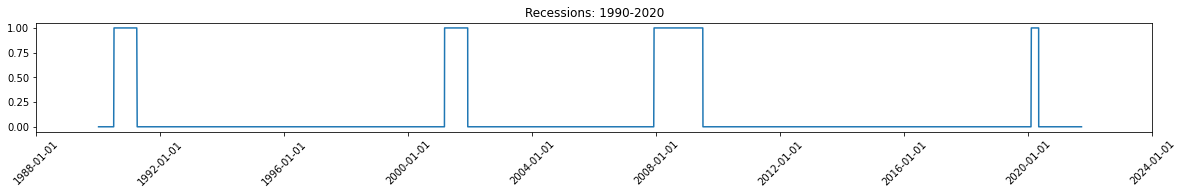

In [198]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(20,2))
fig.subplots_adjust(wspace = 0.4)
fig.subplots_adjust(hspace = 2.5)
ax.plot(df.index, df["Recession "])
ax.set_title("Recessions: 1990-2020")
ax.set_xticks(ax.get_xticks()[::1])
plt.xticks(rotation = 45)
plt.show()

In [199]:
train = df["1990-01-02" : "2016-01-01"]
test = df["2016-01-02" : "2021-09-17"]

In [200]:
train

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,0.20,0.49,0.64,1.03,1.33,1.73,2.06,2.25,2.96,0,1.22,2067.36,2058.73,2060.99,2060.99,1411860000,-0.1601,0.004
2015-12-28,0.23,0.51,0.66,1.05,1.33,1.73,2.05,2.24,2.95,0,1.19,2057.77,2044.20,2056.50,2056.50,2492510000,-0.2183,0.007
2015-12-29,0.23,0.50,0.67,1.09,1.38,1.81,2.12,2.32,3.04,0,1.23,2081.56,2060.54,2078.36,2078.36,2542000000,1.0518,0.010


In [201]:
test

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,Recession,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,,
2016-01-04,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.98,0,1.22,2038.20,1989.68,2012.66,2012.66,4304880000,-1.5542,0.024
2016-01-05,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,3.01,0,1.21,2021.94,2004.17,2016.71,2016.71,3706620000,0.2008,0.009
2016-01-06,0.21,0.47,0.67,0.99,1.26,1.65,1.98,2.18,2.94,0,1.19,2011.71,1979.05,1990.26,1990.26,4336660000,-1.3290,0.016
2016-01-07,0.20,0.46,0.66,0.96,1.22,1.61,1.94,2.16,2.92,0,1.20,1985.32,1938.83,1943.09,1943.09,5076590000,-2.4276,0.024
2016-01-08,0.20,0.45,0.64,0.94,1.20,1.57,1.91,2.13,2.91,0,1.19,1960.40,1918.46,1922.03,1922.03,4664940000,-1.0957,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,0.06,0.06,0.07,0.21,0.44,0.81,1.11,1.33,1.91,0,1.12,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,0.04,0.05,0.07,0.21,0.43,0.79,1.07,1.28,1.85,0,1.07,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,0.04,0.05,0.07,0.21,0.43,0.81,1.10,1.31,1.87,0,1.10,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011


In [202]:
X_train = train.drop(columns=['Recession '])
Y_train = train['Recession ']

In [203]:
X_train

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,
1990-01-02,7.83,7.89,7.81,7.87,7.90,7.87,7.98,7.94,8.00,0.07,359.69,351.98,359.69,359.69,162070000,1.7487,0.021
1990-01-03,7.89,7.94,7.85,7.94,7.96,7.92,8.04,7.99,8.04,0.05,360.59,357.89,358.76,358.76,192330000,-0.2592,0.008
1990-01-04,7.84,7.90,7.82,7.92,7.93,7.91,8.02,7.98,8.04,0.06,358.76,352.89,355.67,355.67,177000000,-0.8688,0.017
1990-01-05,7.79,7.85,7.79,7.90,7.94,7.92,8.03,7.99,8.06,0.09,355.67,351.35,352.20,352.20,158530000,-0.9852,0.012
1990-01-08,7.79,7.88,7.81,7.90,7.95,7.92,8.05,8.02,8.09,0.12,354.24,350.54,353.79,353.79,140110000,0.4494,0.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-24,0.20,0.49,0.64,1.03,1.33,1.73,2.06,2.25,2.96,1.22,2067.36,2058.73,2060.99,2060.99,1411860000,-0.1601,0.004
2015-12-28,0.23,0.51,0.66,1.05,1.33,1.73,2.05,2.24,2.95,1.19,2057.77,2044.20,2056.50,2056.50,2492510000,-0.2183,0.007
2015-12-29,0.23,0.50,0.67,1.09,1.38,1.81,2.12,2.32,3.04,1.23,2081.56,2060.54,2078.36,2078.36,2542000000,1.0518,0.010


In [204]:
Y_train

Date
1990-01-02    0
1990-01-03    0
1990-01-04    0
1990-01-05    0
1990-01-08    0
             ..
2015-12-24    0
2015-12-28    0
2015-12-29    0
2015-12-30    0
2015-12-31    0
Name: Recession , Length: 6497, dtype: int64

In [205]:
X_test = test.drop(columns=['Recession '])
Y_test = test['Recession ']

In [206]:
X_test

,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,30 Yr,diff,High,Low,Close,Adj Close,Volume,% Gain/Loss (Close),% Price Variation
Date,,,,,,,,,,,,,,,,,
2016-01-04,0.22,0.49,0.61,1.02,1.31,1.73,2.06,2.24,2.98,1.22,2038.20,1989.68,2012.66,2012.66,4304880000,-1.5542,0.024
2016-01-05,0.20,0.49,0.68,1.04,1.32,1.73,2.06,2.25,3.01,1.21,2021.94,2004.17,2016.71,2016.71,3706620000,0.2008,0.009
2016-01-06,0.21,0.47,0.67,0.99,1.26,1.65,1.98,2.18,2.94,1.19,2011.71,1979.05,1990.26,1990.26,4336660000,-1.3290,0.016
2016-01-07,0.20,0.46,0.66,0.96,1.22,1.61,1.94,2.16,2.92,1.20,1985.32,1938.83,1943.09,1943.09,5076590000,-2.4276,0.024
2016-01-08,0.20,0.45,0.64,0.94,1.20,1.57,1.91,2.13,2.91,1.19,1960.40,1918.46,1922.03,1922.03,4664940000,-1.0957,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13,0.06,0.06,0.07,0.21,0.44,0.81,1.11,1.33,1.91,1.12,4492.99,4445.70,4468.73,4468.73,3096390000,0.2271,0.011
2021-09-14,0.04,0.05,0.07,0.21,0.43,0.79,1.07,1.28,1.85,1.07,4485.68,4435.46,4443.05,4443.05,2568730000,-0.5780,0.011
2021-09-15,0.04,0.05,0.07,0.21,0.43,0.81,1.10,1.31,1.87,1.10,4486.87,4438.37,4480.70,4480.70,3154760000,0.8403,0.011


In [207]:
Y_test

Date
2016-01-04    0
2016-01-05    0
2016-01-06    0
2016-01-07    0
2016-01-08    0
             ..
2021-09-13    0
2021-09-14    0
2021-09-15    0
2021-09-16    0
2021-09-17    0
Name: Recession , Length: 1429, dtype: int64

In [208]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)

LGBMClassifier()

In [209]:
Y_pred = clf.predict(X_test)

In [210]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_pred, Y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(Y_test, Y_pred)))

LightGBM Model accuracy score: 0.9566


In [213]:
Y_pred_train = clf.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)))

Training-set accuracy score: 1.0000


In [214]:
print('Training set score: {:.4f}'.format(clf.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf.score(X_test, Y_test)))

Training set score: 1.0000
Test set score: 0.9566


In [215]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1367    0]
 [  62    0]]

True Positives(TP) =  1367

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  62


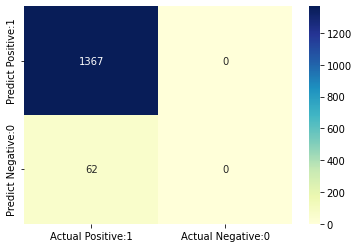

In [218]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [217]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1367
           1       0.00      0.00      0.00        62

    accuracy                           0.96      1429
   macro avg       0.48      0.50      0.49      1429
weighted avg       0.92      0.96      0.94      1429



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
